In [2]:
import random
import numpy as np

In [3]:
def roll_die():
    return random.randint(1,6)

In [4]:
for _ in range(10):
    print(roll_die())

2
4
6
2
4
5
5
1
5
1


In [5]:
sum_of_rolls = 0
for _ in range(500):
    sum_of_rolls += roll_die()

In [6]:
print(sum_of_rolls)

1784


## instead of simply counting total rolls in a test set
#### try to create a list of all outcomes 
#### so it can be graphed later

In [7]:
results = []
for _ in range(500):
    results.append(roll_die())

In [8]:
print(results[:20])

[6, 5, 6, 3, 1, 6, 1, 1, 4, 6, 3, 2, 2, 3, 4, 1, 5, 6, 1, 2]


## 2 ways to set up a counting feature

In [9]:
#manual approach 
counts = {}
for value in results:
    counts[value] = counts.get(value, 0) + 1

In [10]:
#pythonic approach
from collections import Counter
counts = Counter(results)

In [11]:
print(counts)

Counter({6: 100, 3: 92, 5: 84, 4: 79, 2: 79, 1: 66})


In [12]:
frequency_test = []
for _ in range(1000):
    frequency_test.append(roll_die())

In [15]:
frequency_count = Counter(frequency_test)
print(frequency_count)

Counter({3: 176, 5: 175, 6: 173, 2: 166, 1: 158, 4: 152})


In [16]:
print("Average Roll Value: ", (sum(frequency_test)/len(frequency_test)))

Average Roll Value:  3.539


## empirical results vs theoretical probability.

	•	You rolled 1,000 times and captured each result.
	•	You counted the frequencies correctly.
	•	Your distribution is pretty even — all values are hovering near ~166 (which is 1000 ÷ 6).
	•	Slight differences (like 152 vs 176) are just randomness — if you ran it 10,000 times, it would flatten closer to perfect 1/6.

### 👉 That’s a clear simulation of probability in action.

	•	The theoretical mean is 3.5.
	•	You got 3.539 — beautifully close, considering only 1,000 trials.
	•	If you increased trials to 100,000, it would be almost spot-on 3.5.

### 👉 That’s your first real taste of the law of large numbers: the more samples you take, the closer your empirical results get to the theoretical probability.

In [17]:
#rerunning the above trials with a much larger trial size to see if the averages become closer
frequency_test = []
for _ in range(10000):
    frequency_test.append(roll_die())

frequency_count = Counter(frequency_test)
print(frequency_count)

print("Average Roll Value: ", (sum(frequency_test)/len(frequency_test)))

Counter({1: 1731, 2: 1704, 4: 1674, 6: 1658, 5: 1644, 3: 1589})
Average Roll Value:  3.477


In [19]:
def multi_die(t):
    multi_die_test_list = []
    for _ in range(t):
        multi_die_test_list.append(roll_die() + roll_die())
    return print("Multi Die Counter: ", Counter(multi_die_test_list))

In [20]:
multi_die(10000)

Multi Die Counter:  Counter({7: 1614, 8: 1439, 6: 1419, 9: 1121, 5: 1085, 4: 836, 10: 800, 11: 559, 3: 544, 2: 302, 12: 281})


In [26]:
#improving the function to accept 2 arguments

def multi_die(num_dice, num_trials):
    results = []
    for _ in range(num_trials):
        trial_sum = sum(roll_die() for _ in range(num_dice))
        results.append(trial_sum)
    return print(Counter(results))

multi_die(2, 500)

Counter({6: 80, 7: 78, 8: 66, 5: 60, 9: 56, 4: 42, 10: 32, 3: 31, 11: 28, 12: 14, 2: 13})


In [44]:
#modifying the function to print a vertically formatted result

def multi_die(num_dice, num_trials):
    results = []
    for _ in range(num_trials):
        trial_sum = sum(roll_die() for _ in range(num_dice))
        results.append(trial_sum)
    counts = (Counter(results))
    for value in sorted(counts):
        print(f"{value}: {counts[value]}")
    return counts

multi_die(2, 500)

2: 15
3: 22
4: 39
5: 62
6: 75
7: 75
8: 71
9: 51
10: 46
11: 27
12: 17


Counter({7: 75,
         6: 75,
         8: 71,
         5: 62,
         9: 51,
         10: 46,
         4: 39,
         11: 27,
         3: 22,
         12: 17,
         2: 15})

In [46]:
multi_die(2, 100000)

2: 2787
3: 5512
4: 8341
5: 10908
6: 13965
7: 16815
8: 13805
9: 11038
10: 8440
11: 5620
12: 2769


Counter({7: 16815,
         6: 13965,
         8: 13805,
         9: 11038,
         5: 10908,
         10: 8440,
         4: 8341,
         11: 5620,
         3: 5512,
         2: 2787,
         12: 2769})

### First Matplotlib Visual

In [47]:
import matplotlib.pyplot as plt

2: 290
3: 543
4: 898
5: 1152
6: 1336
7: 1700
8: 1328
9: 1065
10: 850
11: 558
12: 280


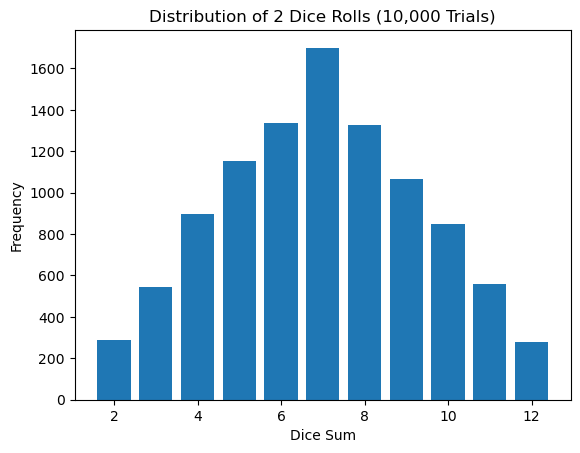

In [48]:
plot_counts = multi_die(2, 10000)
keys = list(plot_counts.keys())
values = list(plot_counts.values())

plt.bar(keys, values)
plt.xlabel("Dice Sum")
plt.ylabel("Frequency")
plt.title("Distribution of 2 Dice Rolls (10,000 Trials)")

plt.show()

### the bar chart confirms the math you already know — 7 is most common, edges are rare. That’s the heart of simulation: “Does reality match theory?” ✅

### ✨ Two next-level tweaks you could try (optional challenges):
#### 1.	Sort the bars by the dice sum - *Sometimes Counter doesn’t keep perfect order*
#### 2.	Normalize to probabilities - *Right now the Y-axis is raw counts (~1600 for 7). If you want to see probabilities (0 to 1 scale), divide each count by the total trials:*

2: 295
3: 585
4: 886
5: 1096
6: 1311
7: 1718
8: 1399
9: 1068
10: 812
11: 544
12: 286


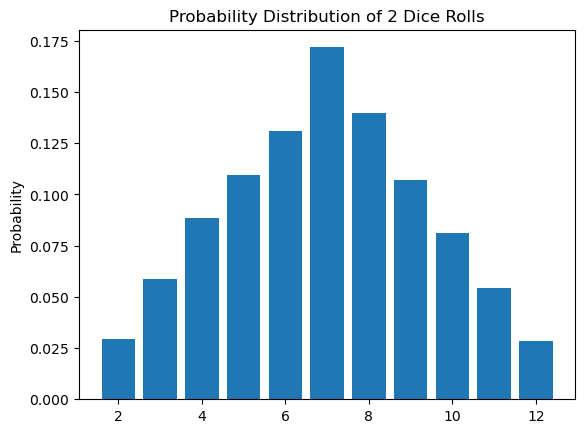

In [49]:
plot_counts = multi_die(2, 10000)
keys = sorted(plot_counts.keys())
values = [plot_counts[k] for k in keys]

total = sum(values)
probabilities = [v/total for v in values]
plt.bar(keys, probabilities)
plt.ylabel("Probability")
plt.title("Probability Distribution of 2 Dice Rolls")

plt.show()